In [165]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
import warnings
warnings.simplefilter(action='ignore')

In [167]:
# импортируем файл с данными о пассажирах
df = pd.read_csv("international-airline-passengers.csv")
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [168]:
#переименование стобца
df = df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Thousands of Passengers'})
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [169]:
#удалим последнюю строку
passengers=df.drop(axis=0, index= 144)
passengers.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [170]:
# превратим дату в индекс и сделаем изменение постоянным
passengers.set_index('Month', inplace = True)
passengers.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [171]:
# превратим дату (наш индекс) в объект datetime
passengers.index = pd.to_datetime(passengers.index)
passengers.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


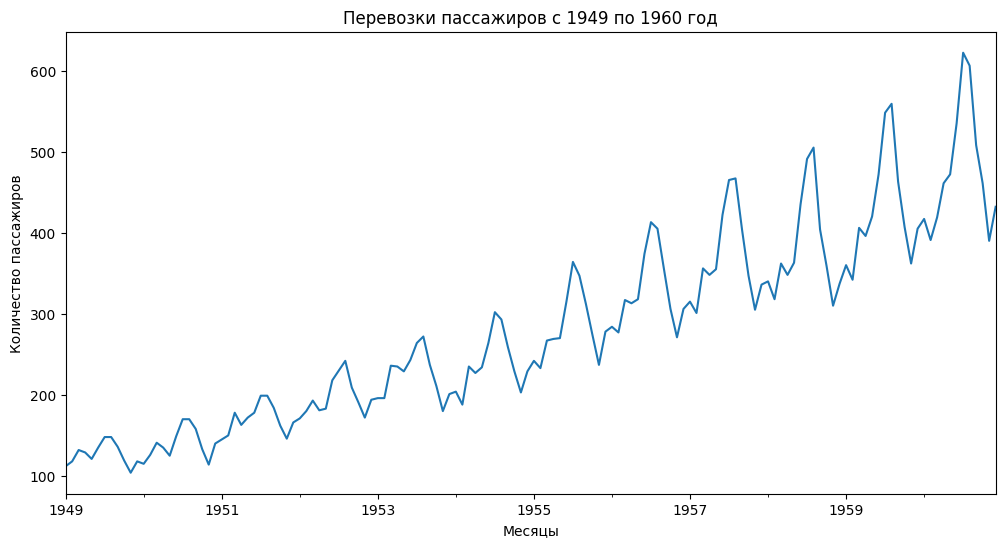

In [172]:
# построим простой график изменения данных во времени прямо в библиотеке Pandas
ax = passengers.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров');

### Анализ временных рядов

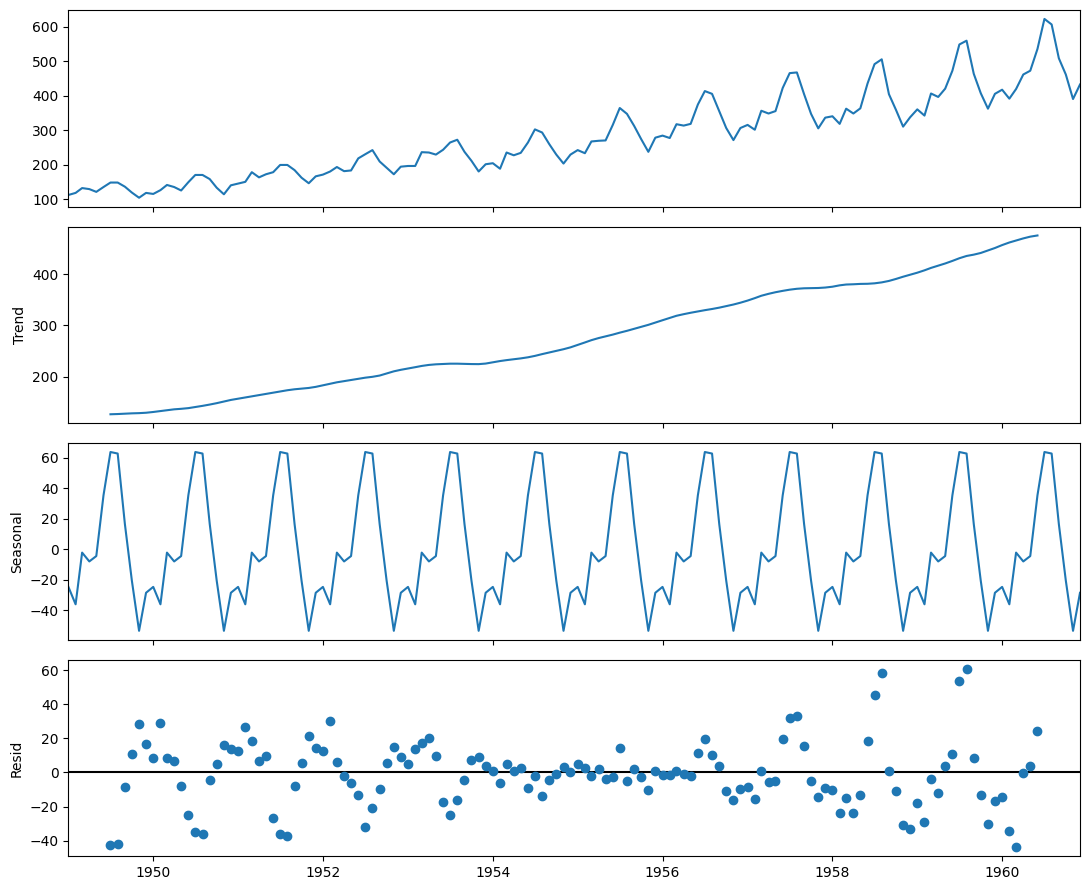

In [173]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

# применяем функцию к данным о перевозках
decompose = seasonal_decompose(passengers)
decompose.plot()

plt.show()

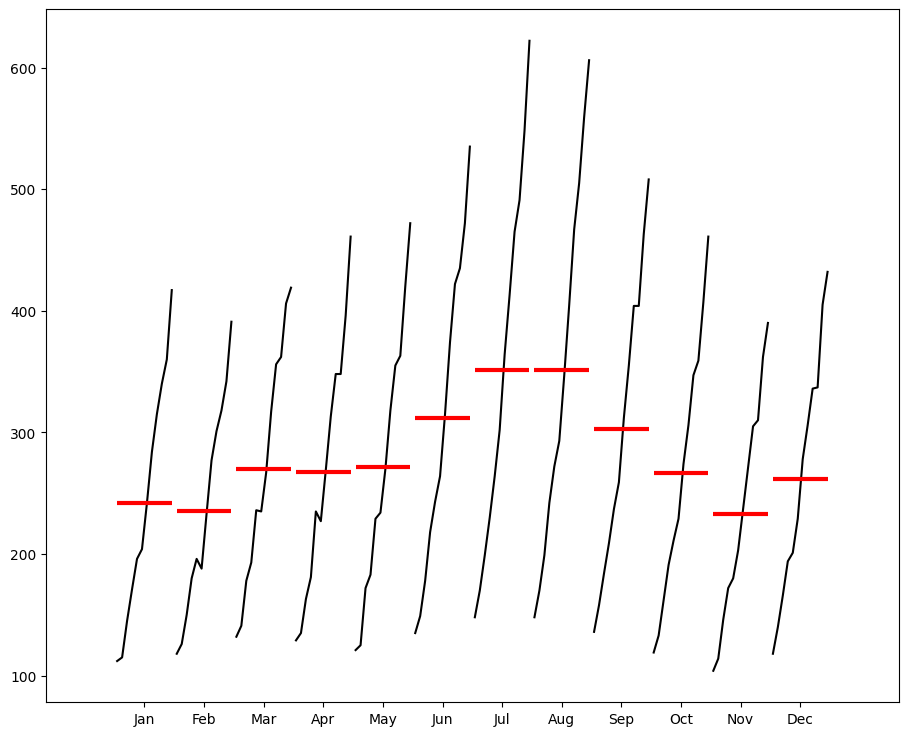

In [174]:
#Исследование сезонности с помощью графиков месяцев
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
month_plot(passengers['Thousands of Passengers']);

### Проверка временного ряда на стационарность

Данные временного ряда считаются стационарными, если они не имеют тенденций или сезонности. То есть среднее значение, дисперсия и ковариация должны быть одинаковыми для любого участка ряда и не являются функциями времени.

In [175]:
# проверка стационарности временного ряда, тест Дикки-Фуллера
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
test = sm.tsa.adfuller(passengers)
print ( 'adf: ', test[0]) 
print ('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  0.8153688792060441
p-value:  0.9918802434376409
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
есть единичные корни, ряд не стационарен


In [176]:
def adf_test(series):
    test = sm.tsa.adfuller(series.dropna(),autolag='AIC')
    print ( 'adf: ', test[0]) 
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

In [177]:
adf_test(passengers['Thousands of Passengers'])

adf:  0.8153688792060441
p-value:  0.9918802434376409
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
есть единичные корни, ряд не стационарен


In [178]:
'''from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
def moving_average(series, n):
   
    return np.average(series[-n:])

def plotMovingAverage(series, window=3, plot_intervals=False, scale=1.96, plot_anomalies=False):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,10))
    plt.title("Скользящее среднее значение\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Скользящее среднее значение тренда")

    # Построение доверительных интервалов для сглаженных значений   
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Имея интервалы, найти аномальные значения
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)


plotMovingAverage(passengers,30,plot_intervals=True) '''

'from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error\ndef moving_average(series, n):\n   \n    return np.average(series[-n:])\n\ndef plotMovingAverage(series, window=3, plot_intervals=False, scale=1.96, plot_anomalies=False):\n\n    rolling_mean = series.rolling(window=window).mean()\n\n    plt.figure(figsize=(15,10))\n    plt.title("Скользящее среднее значение\n window size = {}".format(window))\n    plt.plot(rolling_mean, "g", label="Скользящее среднее значение тренда")\n\n    # Построение доверительных интервалов для сглаженных значений   \n    if plot_intervals:\n        mae = mean_absolute_error(series[window:], rolling_mean[window:])\n        deviation = np.std(series[window:] - rolling_mean[window:])\n        lower_bond = rolling_mean - (mae + scale * deviation)\n        upper_bond = rolling_mean + (mae + scale * deviation)\n        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")\n        plt.plot(lower_bond, "r--")\n        \n        # 

### Автокорреляция

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

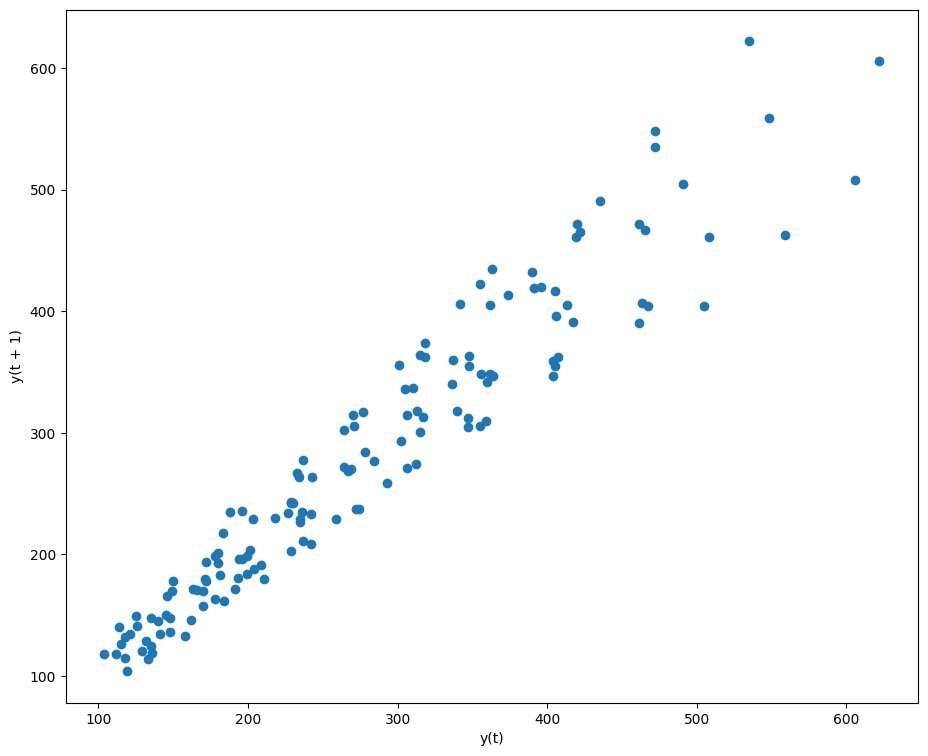

In [179]:
from pandas.plotting import lag_plot

lag_plot(passengers['Thousands of Passengers'])

График свидетельствует об очень сильной автокорреляции. Автокорреляция измеряет линейную связь между предыдущими значениями временного ряда. Поэтому АКФ трендовых временных рядов имеют положительные значения, которые медленно уменьшаются по мере увеличения лагов.

При сезонном характере данных автокорреляции для сезонных лагов (кратных сезонной частоте) будут больше, чем для других лагов.

Когда данные одновременно являются и трендовыми, и сезонными, наблюдается комбинация этих эффектов.

In [180]:


import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])


        plt.tight_layout()
    return 

Критерий Дики-Фуллера: p=0.991880


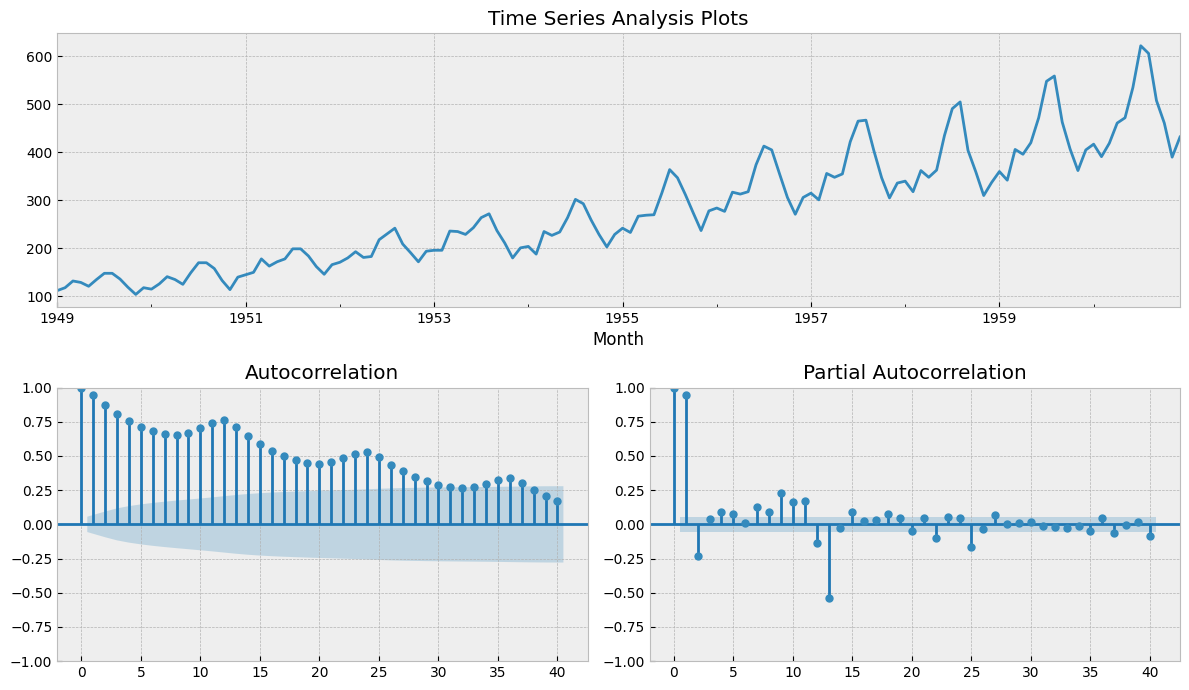

In [181]:
tsplot(passengers['Thousands of Passengers'], lags=40)

На графике АКФ по горизонтальной оси отложены лаги, а по вертикальной - корреляции. Первое значение y0 всегда равно 1.
Медленное уменьшение АКФ по мере увеличения лагов обусловлено трендом, а "гребешковая" форма - сезонностью.

Частичная автокорреляция на лаге k - это автокорреляция между  X't'и X't-k', которые не учитываются лагами с 1 по k-1. График частичной автокорреляции позволяет получить ответы на следующие вопросы:

Подходит ли AR-модель для данных?
Если AR-модель подходит, то какой порядок следует использовать?


### Некоторые методы преобразования нестационарных данных в стационарные

1. Стационарность после регулярного дифференцирования

<Axes: xlabel='Month'>

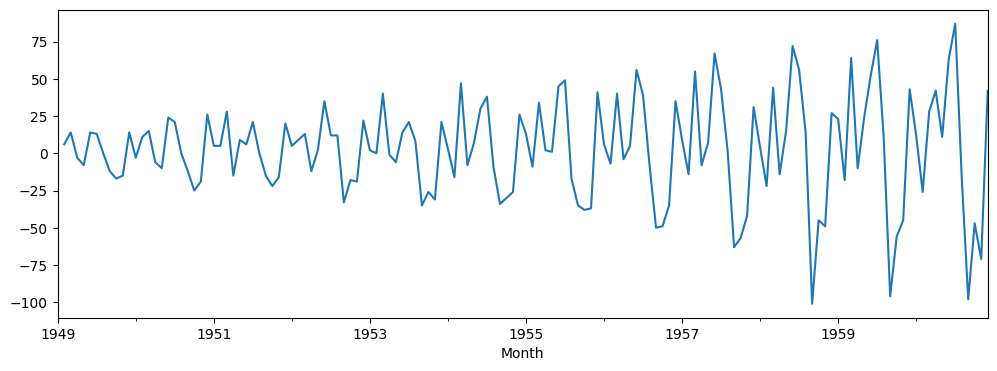

In [182]:
from statsmodels.tsa.statespace.tools import diff

passengers["difference_1"]= diff(passengers["Thousands of Passengers"], k_diff=1)
passengers["difference_1"].plot(figsize=(12,4))

In [183]:
adf_test(passengers["difference_1"])

adf:  -2.8292668241700034
p-value:  0.05421329028382497
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
есть единичные корни, ряд не стационарен


Исходный ряд стационарным не является, критерий Дики-Фуллера не отверг нулевую гипотезу о наличии единичного корня. Попробуем стабилизировать дисперсию преоразованием Бокса-Кокса

<Axes: xlabel='Month'>

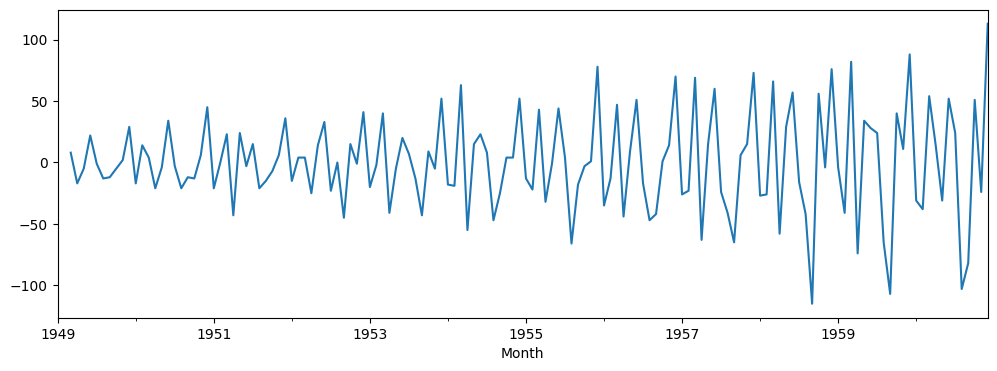

In [184]:
passengers["difference_2"]= diff(passengers["Thousands of Passengers"], k_diff=2)
passengers["difference_2"].plot(figsize=(12,4))

In [185]:
adf_test(passengers["difference_2"])

adf:  -16.38423154246852
p-value:  2.732891850014085e-29
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
единичных корней нет, ряд стационарен


2. Стационарность после сезонного дифференцирования

<Axes: xlabel='Month'>

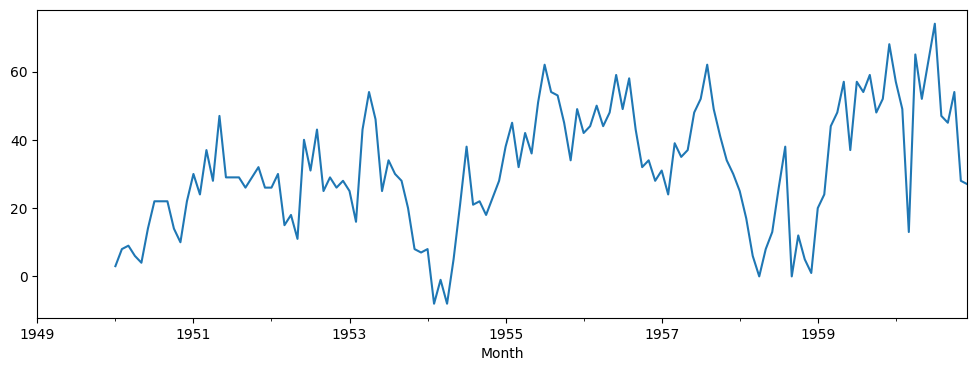

In [186]:
passengers["difference_seasonal"]= diff(passengers["Thousands of Passengers"], k_diff=0,k_seasonal_diff= 1,seasonal_periods= 12)
passengers["difference_seasonal"].plot(figsize=(12,4))

In [187]:
adf_test(passengers["difference_seasonal"])

adf:  -3.3830207264924796
p-value:  0.011551493085515008
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
единичных корней нет, ряд стационарен


3. Преобразования Бокса-Кокса

In [188]:
from scipy. stats import boxcox 

passengers['Weighted_Price_box'], best_lmbda = boxcox(passengers["Thousands of Passengers"])
adf_test(passengers["Weighted_Price_box"])

adf:  -1.3260708968567587
p-value:  0.6171620657003666
Critical values:  {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
есть единичные корни, ряд не стационарен


0.14802265137037945


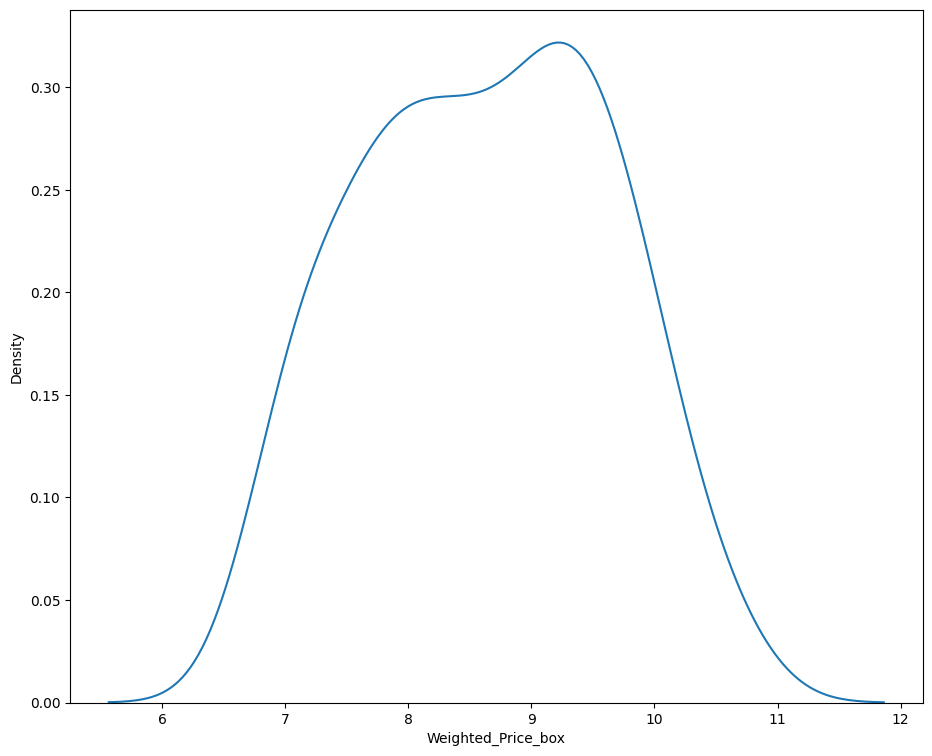

In [189]:
import seaborn as sns 

sns.distplot (passengers['Weighted_Price_box'], hist= False , kde= True ) 
print(best_lmbda)

In [214]:
passengers

,Thousands of Passengers,difference_1,difference_2,difference_seasonal,Weighted_Price_box
Month,,,,,
1949-01-01,112.0,NaN,NaN,NaN,6.827490
1949-02-01,118.0,6.0,NaN,NaN,6.932822
1949-03-01,132.0,14.0,8.0,NaN,7.161892
1949-04-01,129.0,-3.0,-17.0,NaN,7.114611
1949-05-01,121.0,-8.0,-5.0,NaN,6.983787
...,...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0,10.684049
1960-09-01,508.0,-98.0,-82.0,45.0,10.234573
1960-10-01,461.0,-47.0,51.0,54.0,9.992159


### Обучение модели

In [190]:
# Разделение данных на тестовый и обучающий наборы

train= passengers.iloc[:len(passengers)-12]
test= passengers.iloc[len(passengers)-12:]
print(f"Длина train - {len(train)} , длина test {len(test)}")


Длина train - 132 , длина test 12


### **Обучение модели не учитывая сезонность(ARIMA)**

Функция **auto_arima()** подобна сеточному поиску для моделей временных рядов. Она выбирает комбинации p,d,q для моделей ARIMA таким образом, чтобы минимизировать оценку AIC.
AIC оценивает набор моделей и оценивает качество каждой модели относительно других. Для предотвращения перебора моделей предусмотрены штрафы за количество используемых параметров. Чем ниже AIC и BIC, тем лучше модель для прогнозирования.

In [191]:

from pmdarima import auto_arima

auto_arima_results= auto_arima(train["Thousands of Passengers"], 
           start_p=0,
           start_q=0,
           max_p=3,
           max_q=3, # maximum p and q
           m=1,              # frequency of series
           d=None,           # let model determine 'd'
           seasonal=False,   # No Seasonality
           start_P=0, 
           D=0,  
           trace=True,
           error_action='ignore',  
           suppress_warnings=True, 
           stepwise=True)

auto_arima_results.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -603.341
Date:                Thu, 26 Oct 2023   AIC                           1218.683
Time:                        16:03:04   BIC                           1235.934
Sample:                    01-01-1949   HQIC                          1225.692
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7157      0.212      3.379      0.001       0.301       1.131
ar.L1          1.6431      0.028     57.904      0.000       1.587       1.699
ar.L2         -0.9129      0.027    -33.338      0.000      -0.967      -0.859
ma.L1         -1.8478      0.036    -51.463      0.000      -1.918      -1.777
ma.L2          0.9466      0.038     24.988      0.000       0.872       1.021
sigma2       564.8459     67.205      8.405      0.000     433.126     696.566
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.36   Prob(JB):                         0.39
Heteroskedasticity (H):               6.40   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Проверка адекватности модели**
Проверка адекватности, т.е. проверка согласованности выбранной и
оцененной модели с наблюдениями, как и в регрессионном анализе, основано на исследовании остатков. А именно, остатки должны моделировать процесс нормально распределенного белого шума.

График остатков в моделе ARIMA

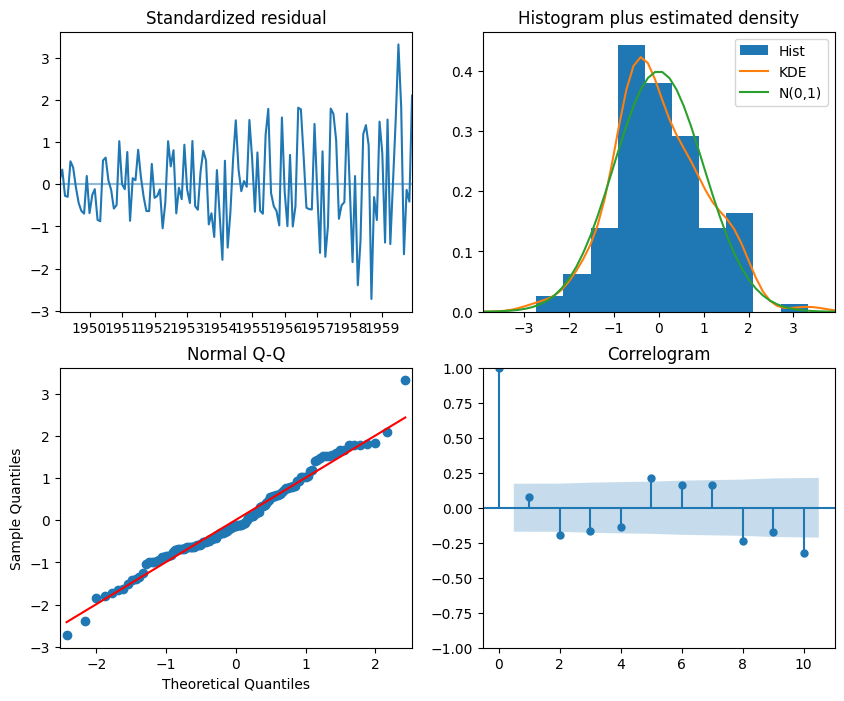

In [192]:
auto_arima_results.plot_diagnostics(figsize=(10,8))
plt.show()

**Стандартизованный остаток:** остатки колеблются вокруг среднего значения, равного нулю, и имеют равномерную дисперсию.
**Гистограмма:** График плотности свидетельствует о нормальном распределении со средним значением, слегка смещенным вправо.   
**Теоретические квантили:** В основном точки идеально совпадают с красной линией. 

**Коррелограмма** (или график ACF) показывает, что остаточные ошибки не являются автокоррелированными. 
График ACF означает, что в остаточных ошибках есть какая-то закономерность, которая не объясняется моделью. Таким образом, в модель необходимо добавить больше иксов (предикторов).

In [193]:
# Обучение ARIMA модели используя значения гиперпараметров из auto_arima

from statsmodels.tsa.arima.model import ARIMA
arima_model= ARIMA(train["Thousands of Passengers"], order= (2,1,2))
arima_model_fit= arima_model.fit()

In [194]:
# Проверяем номальность распределения остатков. Если значение p больше 0,05, значит, остатки распределены нормально
from scipy.stats import normaltest
normaltest(arima_model_fit.resid)

NormaltestResult(statistic=14.011300292684648, pvalue=0.0009067442271572688)

Прогноз на тестовых данных

In [195]:
start= len(train)
end= len(train) + len(test) -1

pred= arima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("ARIMA predictions")

<Axes: title={'center': 'Actual v/s Predictions for Test dataset'}, xlabel='Month'>

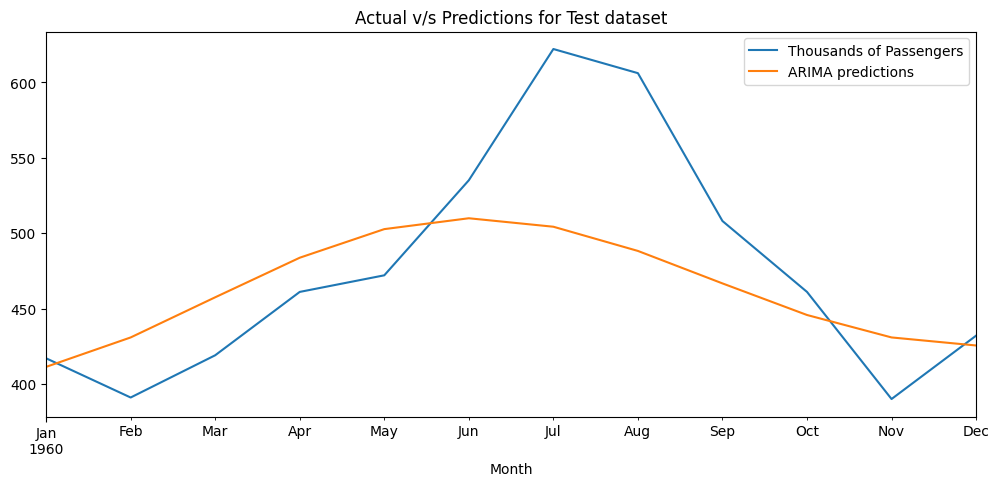

In [196]:
title= "Actual v/s Predictions for Test dataset"
test["Thousands of Passengers"].plot(figsize=(12,5), title= title, legend=True);
pred.plot(legend=True)

In [197]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

mse= mean_squared_error(test["Thousands of Passengers"],pred)
rmse_arima= rmse(test["Thousands of Passengers"], pred)

print(f"Root Mean Square is {rmse_arima} \n")
print(f"Mean Square Error is {mse}")

Root Mean Square is 55.22283882324748 

Mean Square Error is 3049.561927698369


### **Обучение модели,  учитывая сезонность (SARIMA)**

In [198]:
smodel = auto_arima(train["Thousands of Passengers"],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3, 
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1022.029, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.61 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=2.08 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.69 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.06 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.68 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=1.19 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.63 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.94 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Thu, 26 Oct 2023   AIC                            905.686
Time:                                    16:03:33   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

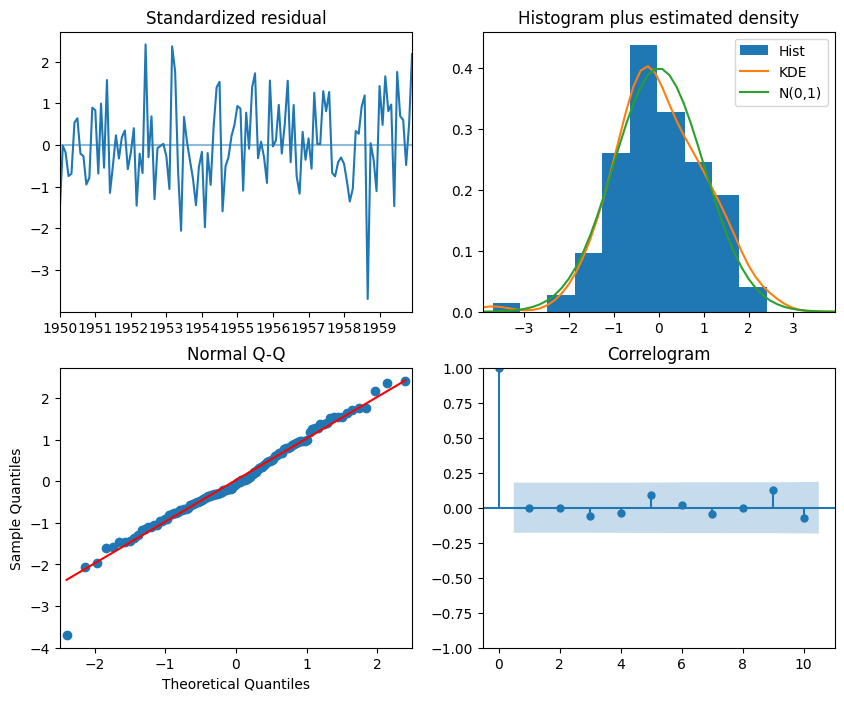

In [199]:
smodel.plot_diagnostics(figsize=(10,8))
plt.show()

In [200]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model= SARIMAX(train["Thousands of Passengers"], order= (3,0,0), seasonal_order= (0,1,0,12))



Root Mean Square is 17.815601011608013 

Mean Square Error is 317.39563940480843


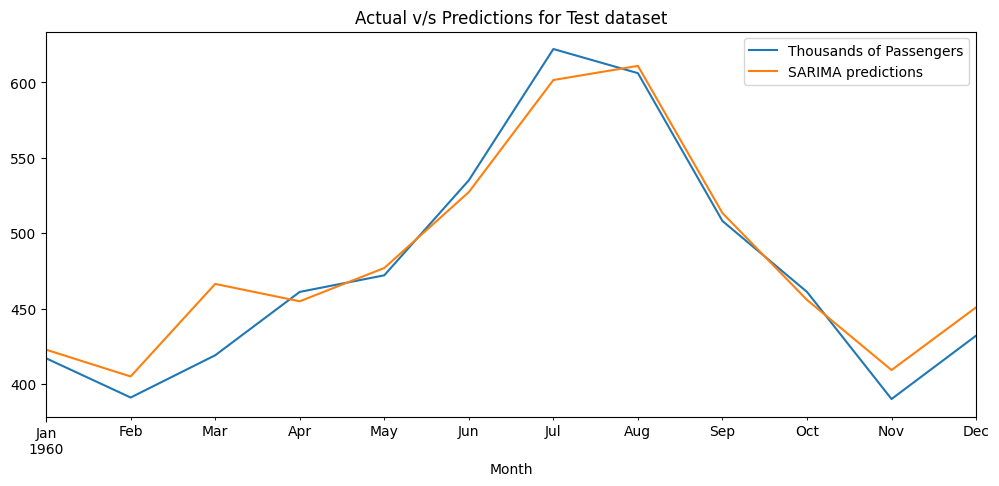

In [201]:
sarima_model_fit= sarima_model.fit()

#Делаем прогноз по тестовым данным
start= len(train)
end= len(train) + len(test) -1
pred= sarima_model_fit.predict(start=start, end=end, dynamic=False, typ="levels").rename("SARIMA predictions")

#Строим график прогноза для тестовых данных
title= "Actual v/s Predictions for Test dataset"
test["Thousands of Passengers"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)


#Оценка модели
mse= mean_squared_error(test["Thousands of Passengers"],pred)
rmse_sarima= rmse(test["Thousands of Passengers"], pred)

print(f"Root Mean Square is {rmse_sarima} \n")
print(f"Mean Square Error is {mse}")

### **SARIMA с экзогенной переменной (SARIMAX)**

Вычислим сезонный индекс, чтобы его можно было принудительно ввести в качестве (экзогенного) предиктора в модель SARIMAX

In [209]:

#мультипликативный сезонный компонент
result_mul = seasonal_decompose(train['Thousands of Passengers'],  
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# объединение с  Train data
train['month'] = train.index.month
train2 = pd.merge(train, seasonal_index, how='left', on='month')
train2.index = train.index  # reassign the index


# объединение с  Test data
test['month'] = test.index.month
test2 = pd.merge(test, seasonal_index, how='left', on='month')
test2.index = test.index  # переназначить индекс

In [210]:
# SARIMAX Model
sxmodel = auto_arima(train2["Thousands of Passengers"],
                     exogenous=train2[['seasonal']],
                    start_p=0,
                    start_q=0,
                    max_p=3,
                    max_q=3, 
                    m=12,
                    start_P=0,
                    seasonal=True,
                    d=None,
                    D=None,
                    trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1022.029, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.83 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.37 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=3.38 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.51 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=1.18 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.79 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.84 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=1.34 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.32 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=1.32 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Thu, 26 Oct 2023   AIC                            905.686
Time:                                    16:09:55   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

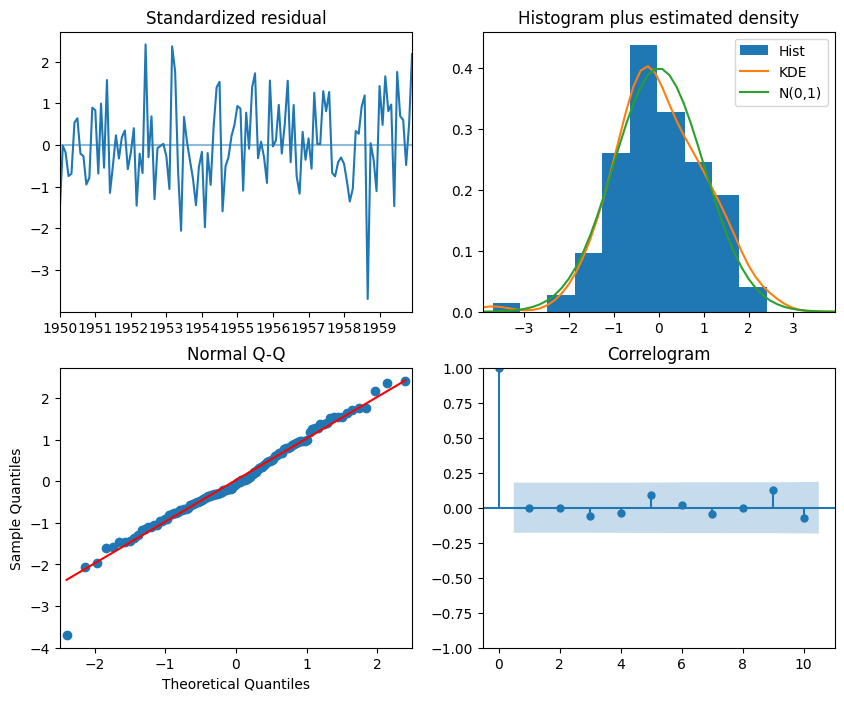

In [207]:
sxmodel.plot_diagnostics(figsize=(10,8))
plt.show()

Root Mean Square is 20.540661800266193 

Mean Square Error is 421.9187871929148


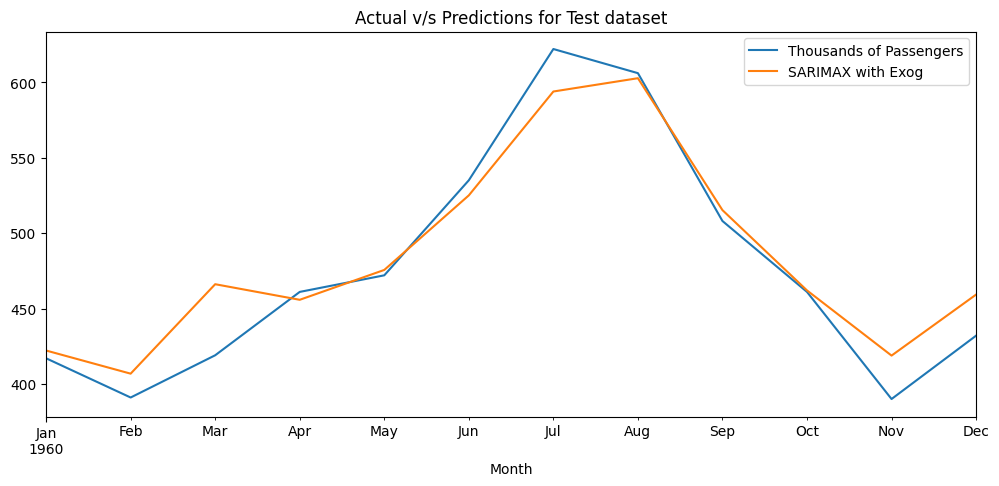

In [204]:
sarimax_model= SARIMAX(train2["Thousands of Passengers"], order= (1,1,0), seasonal_order= (1,0,0,12),exog=train2[['seasonal']])
sarimax_model_fit= sarimax_model.fit()


start= len(train)
end= len(train) + len(test) -1
pred= sarimax_model_fit.predict(start=start, end=end, dynamic=False, typ="levels",exog=test2[['seasonal']]).rename("SARIMAX with Exog")


title= "Actual v/s Predictions for Test dataset"
test["Thousands of Passengers"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)


mse= mean_squared_error(test["Thousands of Passengers"],pred)
rmse_sarimax= rmse(test["Thousands of Passengers"], pred)

print(f"Root Mean Square is {rmse_sarimax} \n")
print(f"Mean Square Error is {mse}")

In [205]:

normaltest(sarimax_model_fit.resid)

NormaltestResult(statistic=174.79472727250774, pvalue=1.106132721790997e-38)

In [206]:
normaltest(sarima_model_fit.resid)

NormaltestResult(statistic=83.95027597221618, pvalue=5.894258731433199e-19)

### **Переобучение модели SARIMA на всех данных и построение прогнозов на будущее**

In [212]:
model= SARIMAX(passengers["Thousands of Passengers"], order= (3,0,0), seasonal_order= (0,1,0,12))
results= model.fit()

start= len(passengers)
end= len(passengers) + len(test) -1

pred= results.predict(start=start, end=end, dynamic=False, typ="levels").rename("Future Forecasts")

<Axes: title={'center': 'Current observations and Future forecasts'}, xlabel='Month'>

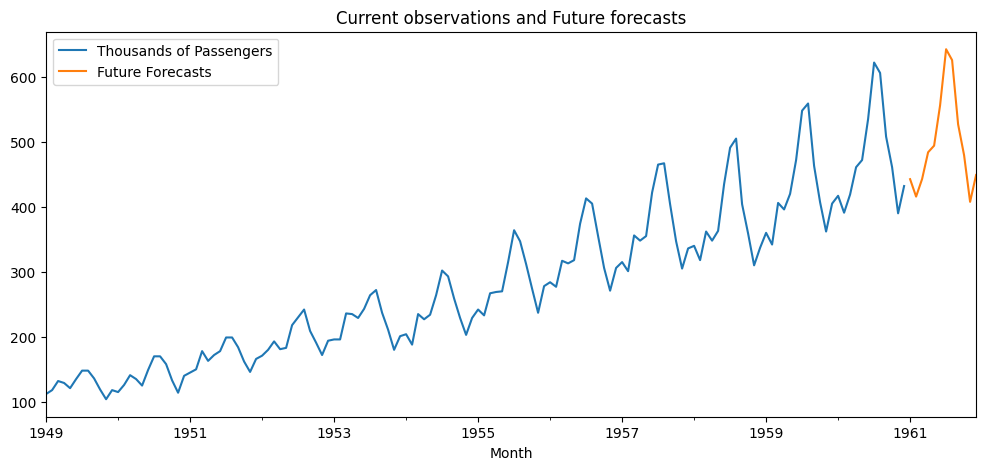

In [213]:
title= "Current observations and Future forecasts"
passengers["Thousands of Passengers"].plot(figsize=(12,5), title= title, legend=True)
pred.plot(legend=True)